In [1]:
import re
import pandas as pd
from konlpy.tag import Okt
from gensim import corpora, models

stopwords = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '과', '와', '의', '로', '으로', '하다', '이다','한', '했다', '하고' ,'인','적','한','상'
    ,'게', '거', '말', '간', '축', '책', '작가', '이야기', '작품', '선', '란', '개', '다시', '독자', '베스트셀러', '정세랑', '김영하', '스', '대', '됭',
    '곤', '위', '된다', '지', '윤재', '출', '속', '소설', '장편소설', '자이니치', '사라마구'
    # 추가적인 불용어 추가
]

# 데이터 로드
data = pd.read_csv(r"세종대_전처리_완료.csv")  

# 전처리를 위한 토크나이저 생성
tokenizer = Okt()

# 전처리 함수 정의
def preprocess_text(text):
    tokens = tokenizer.morphs(text)  # 형태소 분석
    tokens = [re.sub('[\[\],\']', '', token) for token in tokens]  # '['와 ']' 사이의 문자 및 ',' 제거
    tokens = [token for token in tokens if token not in stopwords]  # 불용어 제거
    tokens = [token for token in tokens if token]  # Remove empty tokens
    # 추가적인 전처리 작업 수행
    return tokens

In [2]:
from gensim.models import Word2Vec
from gensim.corpora import Dictionary
import nltk

In [3]:
# 텍스트 전처리
data['preprocessed'] = data['책소개'].apply(preprocess_text) 

In [4]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [5]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
대한: 0.0067
종교: 0.0067
삶: 0.0061
세기: 0.0056
사기: 0.0056
서양: 0.0055
번역: 0.0050
하여: 0.0050
구토: 0.0045
열전: 0.0045

토픽 2:
정보: 0.0072
번역: 0.0055
정리: 0.0054
세계: 0.0049
법: 0.0049
군주: 0.0049
미래: 0.0043
라다크: 0.0043
뇌: 0.0043
시대: 0.0042

토픽 3:
사회: 0.0059
대한: 0.0053
역사: 0.0047
당시: 0.0047
군주: 0.0047
군주론: 0.0047
될: 0.0041
뿐: 0.0041
정치: 0.0041
세계: 0.0036

토픽 4:
괴테: 0.0068
행복: 0.0048
사회: 0.0042
문학: 0.0042
장면: 0.0042
가장: 0.0042
세기: 0.0042
삶: 0.0037
꿈: 0.0037
역사: 0.0037

토픽 5:
사회: 0.0075
개인: 0.0074
자유: 0.0074
국가: 0.0074
시대: 0.0036
번역: 0.0035
고전: 0.0035
게르만족: 0.0035
다산: 0.0035
공자: 0.0035



In [6]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.38002223682104125


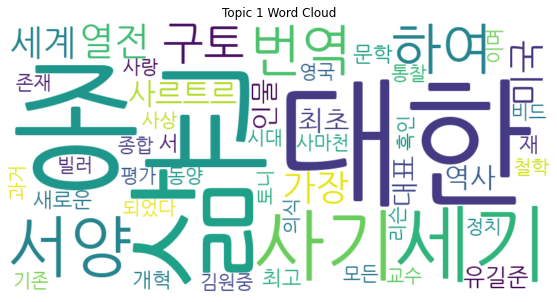

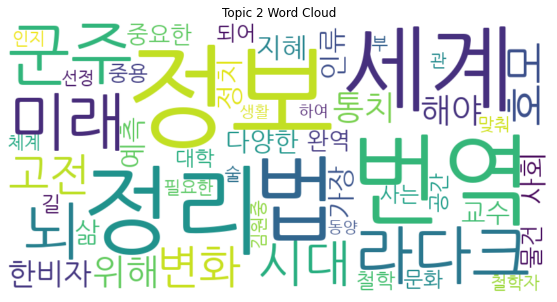

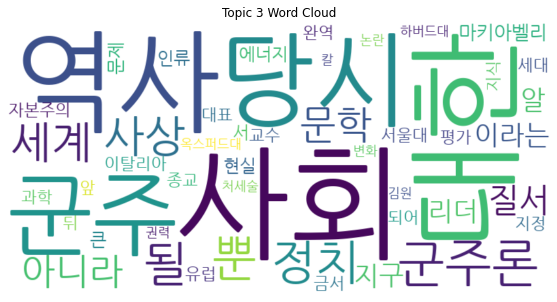

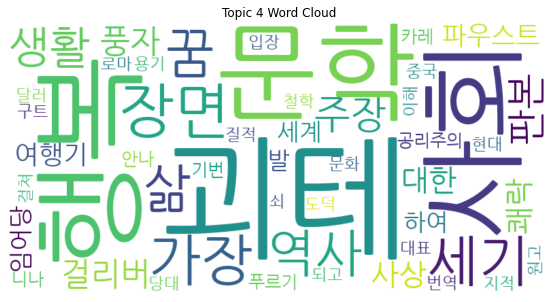

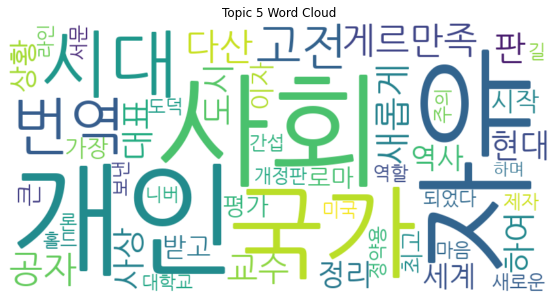

In [7]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()

In [8]:
# 텍스트 전처리
data['preprocessed'] = data['저자소개'].apply(preprocess_text) 

In [9]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [10]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
대학: 0.0064
건축: 0.0055
하여: 0.0051
문학: 0.0051
러시아: 0.0047
집필: 0.0043
하였다: 0.0042
교수: 0.0038
관: 0.0038
되어: 0.0038

토픽 2:
피렌체: 0.0060
세계: 0.0054
역사: 0.0050
영국: 0.0044
번역: 0.0034
리슨: 0.0034
대학교: 0.0031
미국: 0.0031
대한: 0.0031
하여: 0.0031

토픽 3:
괴테: 0.0063
사상: 0.0040
문학: 0.0040
되었다: 0.0037
주의: 0.0037
독일: 0.0036
체코: 0.0033
대학: 0.0031
공부: 0.0031
한비자: 0.0030

토픽 4:
세: 0.0171
저술: 0.0048
되었다: 0.0048
임명: 0.0048
후: 0.0042
공자: 0.0042
루소: 0.0042
역사: 0.0037
집필: 0.0036
사상: 0.0036

토픽 5:
대학: 0.0082
활동: 0.0056
철학: 0.0049
세계: 0.0045
문학: 0.0042
발표: 0.0041
보르헤스: 0.0041
하여: 0.0038
큰: 0.0038
카뮈: 0.0038



In [11]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.36099820492002144


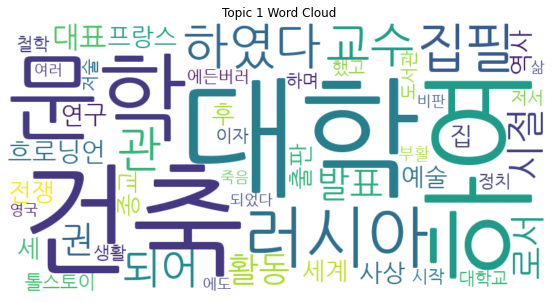

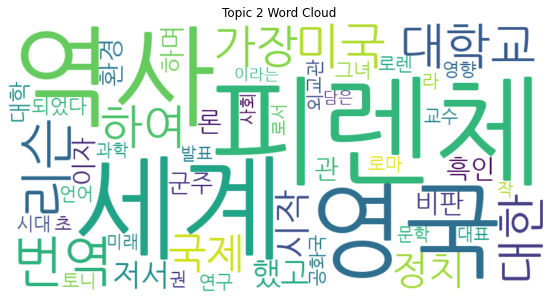

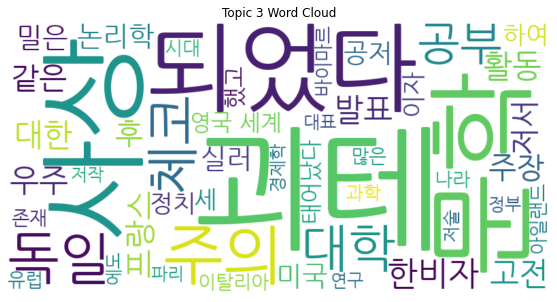

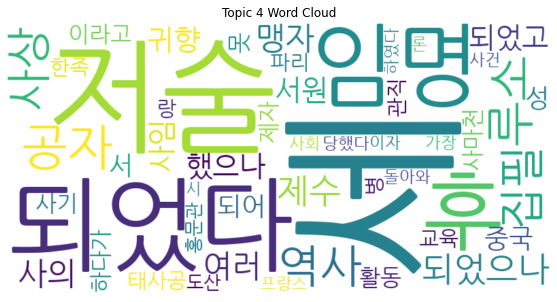

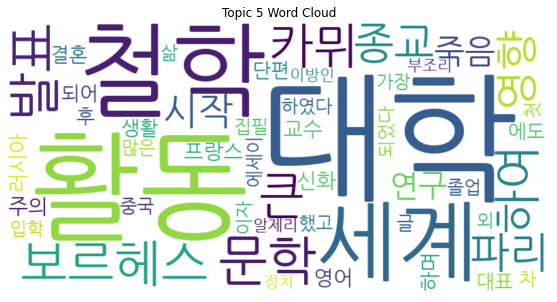

In [12]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()